In [17]:
def tri_stage_scheduler(optimizer, total_steps, phase_ratio=[0.03, 0.9, 0.07], low=1e-6):
        """
        Tri-stage LR scheduler that applies:
        - Warmup phase: LR increases linearly from 0 to base LR.
        - Constant phase: LR stays constant.
        - Decay phase: LR decreases linearly to 0.
        
        phase_ratio: a list with ratios for [warmup, constant, decay] phases.
        """
        warmup_steps = int(phase_ratio[0] * total_steps)
        constant_steps = int(phase_ratio[1] * total_steps)
        decay_steps = int(phase_ratio[2] * total_steps)

        def lr_lambda(current_step):
            if current_step < warmup_steps:
                # Linear warmup: from 0 to 1
                return float(current_step) / float(max(1, warmup_steps))
            elif current_step < warmup_steps + constant_steps:
                # Constant phase: LR stays at base value (multiplier 1)
                return 1.0
            else:
                # Linear decay: from 1 down to low over decay_steps
                decay_step = current_step - (warmup_steps + constant_steps)
                return max( low, (1.0 - float(decay_step) / float(max(1, decay_steps))) )
        return LambdaLR(optimizer, lr_lambda)
    
import torch
import torch.optim as optim

from torch.optim.lr_scheduler import LambdaLR

# Example usage
model = torch.nn.Linear(10, 2)  # Example model
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = tri_stage_scheduler(optimizer, total_steps=1000, phase_ratio=[0.1, 0.0, 0.9], low=1e-1)

# Simulate training loop
for step in range(1000):
        # Simulate a training step
        scheduler.step()  # Update the learning rate
        print(f"Step {step}, LR: {scheduler.get_last_lr()[0]}")
# This code is a tri-stage learning rate scheduler for PyTorch.
# It includes a warmup phase, a constant phase, and a decay phase.
# The learning rate is adjusted based on the current step in the training process.


Step 0, LR: 1e-05
Step 1, LR: 2e-05
Step 2, LR: 3e-05
Step 3, LR: 4e-05
Step 4, LR: 5e-05
Step 5, LR: 6e-05
Step 6, LR: 7.000000000000001e-05
Step 7, LR: 8e-05
Step 8, LR: 8.999999999999999e-05
Step 9, LR: 0.0001
Step 10, LR: 0.00011
Step 11, LR: 0.00012
Step 12, LR: 0.00013000000000000002
Step 13, LR: 0.00014000000000000001
Step 14, LR: 0.00015
Step 15, LR: 0.00016
Step 16, LR: 0.00017
Step 17, LR: 0.00017999999999999998
Step 18, LR: 0.00019
Step 19, LR: 0.0002
Step 20, LR: 0.00021
Step 21, LR: 0.00022
Step 22, LR: 0.00023
Step 23, LR: 0.00024
Step 24, LR: 0.00025
Step 25, LR: 0.00026000000000000003
Step 26, LR: 0.00027
Step 27, LR: 0.00028000000000000003
Step 28, LR: 0.00029
Step 29, LR: 0.0003
Step 30, LR: 0.00031
Step 31, LR: 0.00032
Step 32, LR: 0.00033
Step 33, LR: 0.00034
Step 34, LR: 0.00035
Step 35, LR: 0.00035999999999999997
Step 36, LR: 0.00037
Step 37, LR: 0.00038
Step 38, LR: 0.00039000000000000005
Step 39, LR: 0.0004
Step 40, LR: 0.00041
Step 41, LR: 0.00042
Step 42, LR: 

In [16]:
0.000011*1000000


11.0

In [7]:
output

tensor([[1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000,
         1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000,
         1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000,
         1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000,
         1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000,
         1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000,
         1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000,
         1.5000]])

0.0625


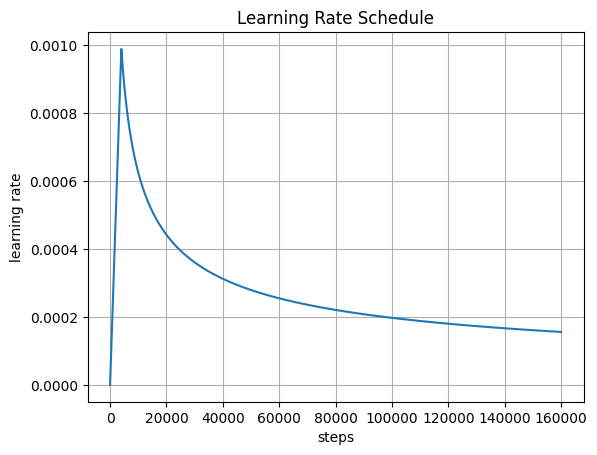

In [9]:
import torch
import numpy as np


class ScheduledOptim:
    """ A simple wrapper class for learning rate scheduling """

    def __init__(self, current_step=1):

        self.n_warmup_steps = 4000
        self.anneal_steps = []
        self.anneal_rate = 1.0
        self.current_step = current_step
        self.init_lr = np.power(256, -0.5)

    def _get_lr_scale(self):
        lr = np.min(
            [
                np.power(self.current_step, -0.5),
                np.power(self.n_warmup_steps, -1.5) * self.current_step,
            ]
        )
        for s in self.anneal_steps:
            if self.current_step > s:
                lr = lr * self.anneal_rate
        return lr

    def _update_learning_rate(self):
        """ Learning rate scheduling per step """
        self.current_step += 1
        lr = self.init_lr * self._get_lr_scale()
        
        return lr
    
optim = ScheduledOptim()
print(optim.init_lr)

l = []
for i in range(160000):
    lr = optim._update_learning_rate()
    l.append(lr)
    
import matplotlib.pyplot as plt
plt.plot(l)
plt.xlabel('steps')
plt.ylabel('learning rate')
plt.title('Learning Rate Schedule')
plt.grid()

0.0625


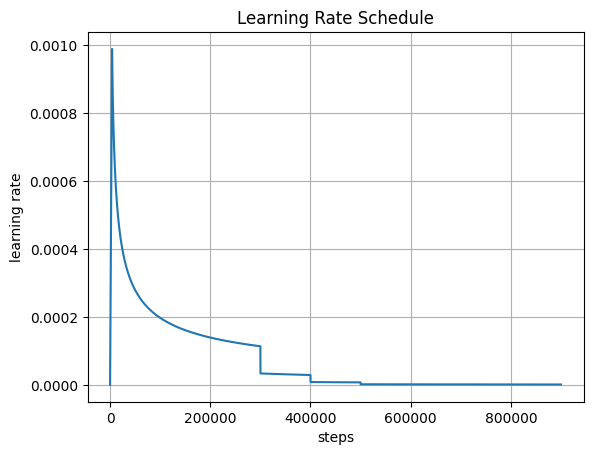

In [16]:
import torch
import numpy as np


class ScheduledOptim:
    """ A simple wrapper class for learning rate scheduling """

    def __init__(self, current_step=1):

        self.n_warmup_steps = 4000
        self.anneal_steps = [300000, 400000, 500000]
        self.anneal_rate = 0.3
        self.current_step = current_step
        self.init_lr = np.power(256, -0.5)

    def _get_lr_scale(self):
        lr = np.min(
            [
                np.power(self.current_step, -0.5),
                np.power(self.n_warmup_steps, -1.5) * self.current_step,
            ]
        )
        for s in self.anneal_steps:
            if self.current_step > s:
                lr = lr * self.anneal_rate
        return lr

    def _update_learning_rate(self):
        """ Learning rate scheduling per step """
        self.current_step += 1
        lr = self.init_lr * self._get_lr_scale()
        
        return lr
    
optim = ScheduledOptim()
print(optim.init_lr)

l = []
for i in range(900000):
    lr = optim._update_learning_rate()
    l.append(lr)
    
import matplotlib.pyplot as plt
plt.plot(l)
plt.xlabel('steps')
plt.ylabel('learning rate')
plt.title('Learning Rate Schedule')
plt.grid()

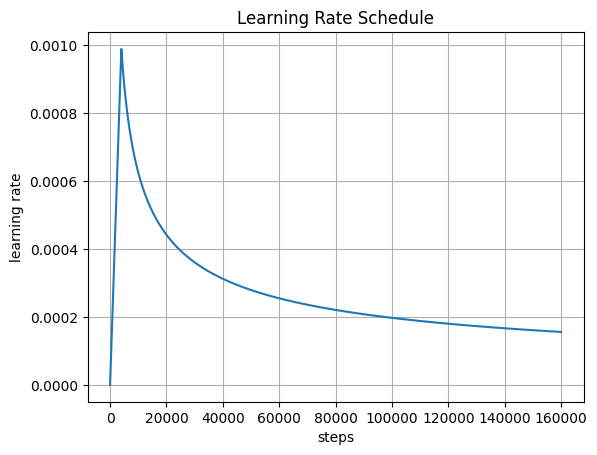